<div>
<a href="https://github.com/groupmm/edu_novfct"><img src="data/Edu_NovFct_Teaser.png" width=100% style="float: right;" alt="PCP Teaser"></a>
</div>

<div>
<h2>Figure 2<br> <small>Computation of a novelty function based on spectral flux used for onset detection. </small></h2> </div>

This notebook provides code for reproducing the subfigures of Figure 2 of the paper.
- Figure 2a: Music signal (shown as waveform).
- Figure 2b: Annotation of target onsets for the occurring instruments.
- Figure 2c: Magnitude spectrogram.
- Figure 2d: Compressed magnitude spectrogram.
- Figure 2e: Novelty function.

### Figure 2a
Audio recording of the beginning of the song “Another One Bites the Dust” by Queen.

<audio src="./data/example_Queen_audio.mp3" type="audio/mpeg" controls="controls"></audio>

In the following code cell, we do the following:
* Import all necessary libraries and functions used in the notebook.
* Set the configurations for the figures.
* Plot the waveform of the audio excerpt (Figure 2a).


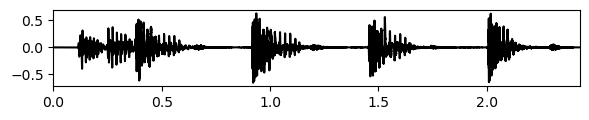

In [6]:
import os
import numpy as np
import librosa
# from scipy import signal
from matplotlib import pyplot as plt
import libfmp.b
# import libfmp.c2
# import libfmp.c6
# import warnings
# warnings.filterwarnings('ignore')

%matplotlib inline

### load audio wav 
fn_wav = os.path.join('./data/example_Queen_audio.wav')
x, Fs = librosa.load(fn_wav)
x_duration = len(x)/Fs

### Settings of the figures
export = False
figsize=(6.0,1.3)
figsize_ann=(6.3,1.2)
figsize_label=(6.2,1.3)
figsize_colorbar=(6.7,1.8)
dpi = 100
plot_xlim = [0, x_duration]
plot_ylim_wav = [-1.05, 1.05]
plot_ylim = [0, 1.1]

### Plot the wav
libfmp.b.plot_signal(x, Fs, color='k', dpi=dpi, figsize=figsize, xlabel='')
plt.tight_layout()
output_path= os.path.join('./export/Figure02a.png')
if export == True:
    plt.savefig(output_path)

### Figure 2b

Annotation of target onsets for the occurring instruments.

In the following code cell, we read and visualize the annotation of target onsets for the occuring instruments (Figure 2b). 

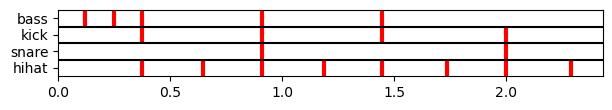

In [7]:
### Figure02b
### Plot annotations
fn_ann_inst = os.path.join('./data/example__Queen_inst.csv')
ann_inst, label_keys_inst = libfmp.c6.read_annotation_pos(fn_ann_inst)
label_keys = {'bass': {'linewidth': 3, 'color': 'r'},
              'kick': {'linewidth': 3, 'color': 'r'},
              'snare': {'linewidth': 3, 'color': 'r'},
              'hihat': {'linewidth': 3, 'color': 'r'}}

fig, ax = libfmp.b.plot_annotation_multiline(ann_inst, label_keys=label_keys, 
                                   sort_labels=['hihat','snare','kick','bass'],  dpi=dpi, figsize=figsize_ann)

ax.set_xlim(plot_xlim);
output_path = os.path.join('./export/Figure02b.png')
if export == True:
    plt.savefig(output_path)

### Figure 2c

Magnitude spectrogram.

In the following code cell, we apply short-time Fourier transform to the audio, keep only information below 3000 Hz, and derive the magnitude spectrogram.

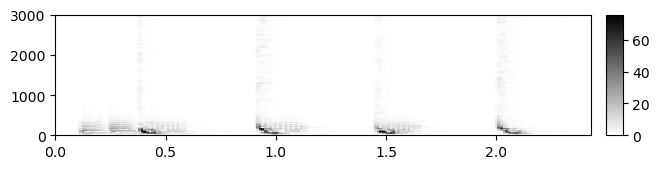

In [8]:
### Figure02c
### Plot magnitude STFT
N, H = 1024, 256
X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hann')
freq_max = 3000 ## only consider 0~3000 Hz
coef_max = np.floor(freq_max / (Fs/N)).astype(int) ## calculate the corresponding frequcency coeficient of 3000 Hz
X[coef_max:-1,:]=0 ## set the components with frequency higher than 3000 Hz as zeros.
Y = np.abs(X) 

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 0.03], 'height_ratios': [1]}, figsize=figsize_colorbar, dpi=dpi)
libfmp.b.plot_matrix(Y, Fs=Fs/H, Fs_F=N/Fs, ylim=[0,freq_max], ax=[ax[0], ax[1]], title='', xlabel='', ylabel='')
ax[0].set_xlim(plot_xlim)
plt.tight_layout()
output_path = os.path.join('./export/Figure02c.png')
if export == True:
    plt.savefig(output_path)

### Figure 2d

Compressed magnitude spectrogram.

In the following code cell, we apply log-compression to the magnituge spectrogram of Figure 2c to derive Figure 2d. 

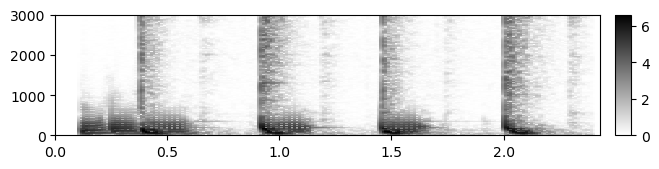

In [9]:
### Figure02d
### Plot log-compressed magnitude STFT
gamma = 10
Y = np.log(1 + gamma * np.abs(X))

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 0.03], 'height_ratios': [1]}, figsize=figsize_colorbar, dpi=dpi)
libfmp.b.plot_matrix(Y, Fs=Fs/H, Fs_F=N/Fs, ylim=[0,freq_max], ax=[ax[0], ax[1]], title='', xlabel='', ylabel='')
ax[0].set_xlim(plot_xlim)
plt.tight_layout()
output_path = os.path.join('./export/Figure02d.png')
if export == True:
    plt.savefig(output_path)


### Figure 2e

Novelty function based on spectral flux.

In the following code cell, we derive and a novelty function based on spectral flux. 

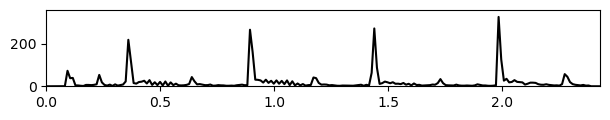

In [10]:
### Figure02e
### Calculate the novelty function
Y_diff = np.diff(Y, n=1)
Y_diff[Y_diff < 0] = 0
nov = np.sum(Y_diff, axis=0)
nov = np.concatenate((nov, np.array([0])))
Fs_nov = Fs/H

libfmp.b.plot_signal(nov, Fs_nov, color='k', dpi=dpi, figsize=figsize_label, xlabel='')
plt.xlim(plot_xlim)
plt.tight_layout()
output_path = os.path.join('./export/Figure02e.png')
if export == True:
    plt.savefig(output_path)

### Further Notes and Links
<ul>
<li><span style="color:black">
Meinard Müller and Ching-Yu Chiu: <a href="https://ieeexplore.ieee.org/document/6353546"><strong>A Basic Tutorial on Novelty and Activation Functions for Music Signal Processing.</strong></a> Transaction of the International Society for Music Information Retrieval (TISMIR), ??: ??–??, 2024. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="./data/bibtex_MuellerC24_EduNovFct_TISMIR.txt"> Bibtex </a>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="https://github.com/groupmm/edu_novfct">GitHub</a></span></li>
</ul> 



* In the [FMP notebook on spectral-based novelty](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C6/C6S1_NoveltySpectral.html), one finds a detailed introduction to spectral-based novelty.

<div>
<a href="https://opensource.org/licenses/MIT"><img src="data/Edu_NovFct_License.png" width=100% style="float: right;" alt="PCP License"></a>
</div>